In [87]:
from sklearn.datasets import load_files       
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

# define function to load train, test, and validation datasets
def load_dataset(path):
    kaddi_names = [item[8:-1] for item in sorted(glob(path+"/*/"))]
    data = load_files(path)
    kaddi_files = np.array(data['filenames'])
    kaddi_targets = np_utils.to_categorical(np.array(data['target']), len(kaddi_names))
    return kaddi_files, kaddi_targets, kaddi_names;

In [88]:
kaddi_files, kaddi_targets, kaddi_names = load_dataset('Dataset')

In [89]:
kaddi_files

array(['Dataset/bad_sticks/b655.jpg', 'Dataset/good_sticks/g219.jpg',
       'Dataset/good_sticks/g1877.jpg', ...,
       'Dataset/good_sticks/g1373.jpg', 'Dataset/good_sticks/g2231.jpg',
       'Dataset/good_sticks/g2344.jpg'], 
      dtype='<U29')

In [90]:
kaddi_targets

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       ..., 
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.]])

In [91]:
kaddi_names

['bad_sticks', 'good_sticks']

In [92]:
train_files, test_files, train_targets, test_targets = train_test_split(kaddi_files, kaddi_targets, test_size=0.2, random_state=1)

train_files, valid_files, train_targets, valid_targets = train_test_split(train_files, train_targets, test_size=0.2, random_state=1)

# # print statistics about the dataset
print('There are %d total kaddi categories.' % len(kaddi_names))
print('There are %s total kaddi images.\n' % len(kaddi_files))
print('There are %d training kaddi images.' % len(train_files))
print('There are %d validation kaddi images.' % len(valid_files))
print('There are %d test kaddi images.'% len(test_files))

There are 2 total kaddi categories.
There are 4500 total kaddi images.

There are 2880 training kaddi images.
There are 720 validation kaddi images.
There are 900 test kaddi images.


In [193]:
def get_dist(targets):
    return np.sum(targets, axis=0)

def barPlot(target_dist, name):
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    y_pos = np.arange(len(kaddi_names))
    performance = target_dist
    ax.barh(y_pos, performance,align='center',
            color=['red','green'], ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(kaddi_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Count')
    ax.set_title(name)
#     axs[1].pie(target_dist, labels=kaddi_names, autopct='%1.1f%%', shadow=False, radius=0.75)
    plt.savefig(name+' bar.png')
    plt.show()
    

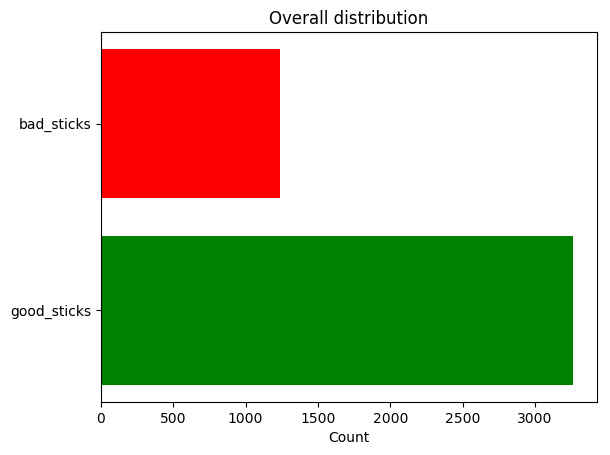

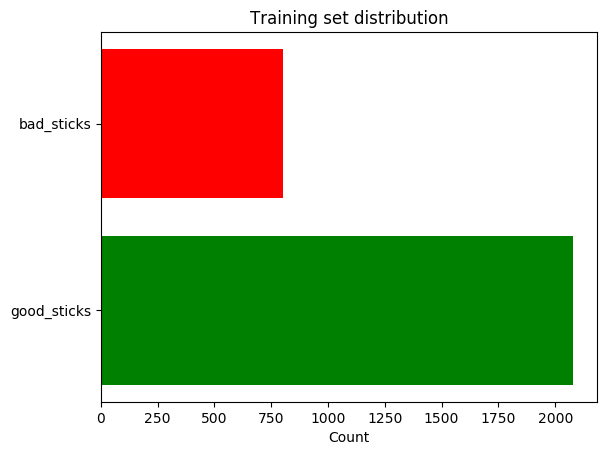

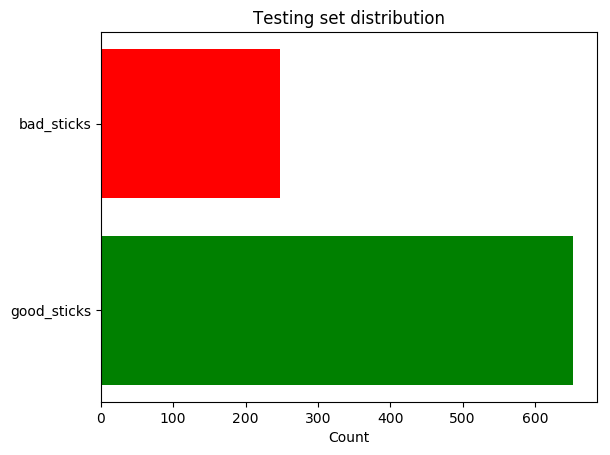

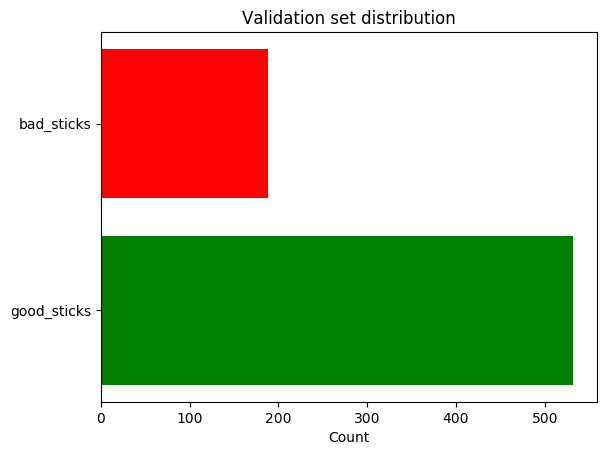

In [194]:
barPlot(get_dist(kaddi_targets), "Overall distribution")
barPlot(get_dist(train_targets), "Training set distribution")
barPlot(get_dist(test_targets), "Testing set distribution")
barPlot(get_dist(valid_targets), "Validation set distribution")

In [180]:
def pieChart(target_dist, name):
    plt.rcdefaults()
    fig, ax = plt.subplots()

#     # Example data
#     y_pos = np.arange(len(kaddi_names))
#     performance = target_dist
#     ax.barh(y_pos, performance,align='center',
#             color=['red','green'], ecolor='black')
#     ax.set_yticks(y_pos)
#     ax.set_yticklabels(kaddi_names)
#     ax.invert_yaxis()  # labels read top-to-bottom
#     ax.set_xlabel('Count')


    ax.pie(target_dist, labels=kaddi_names, autopct='%1.1f%%', shadow=False, radius=0.75)
    ax.set_title(name)
    plt.savefig(name+' pie'+'.png')
    plt.show()
    

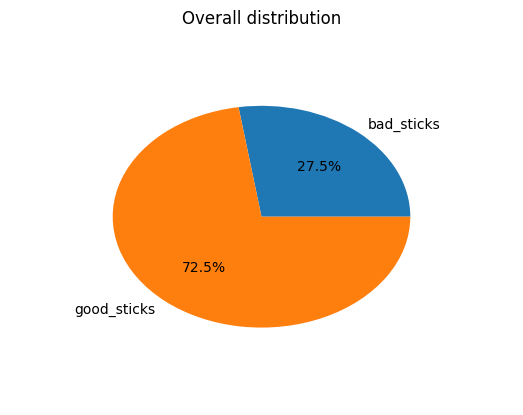

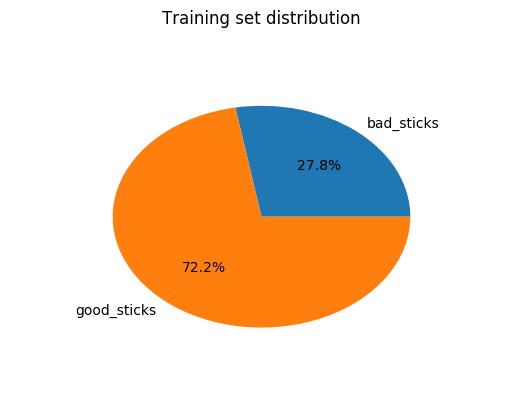

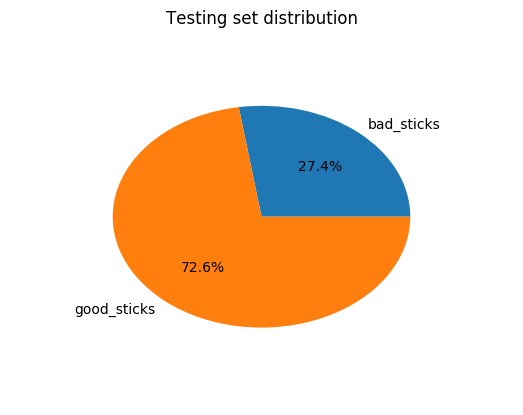

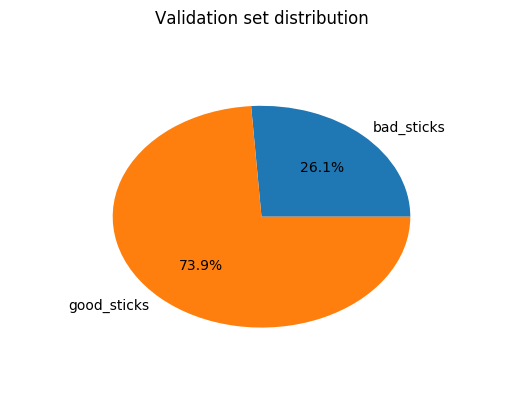

In [181]:
pieChart(get_dist(kaddi_targets), "Overall distribution")
pieChart(get_dist(train_targets), "Training set distribution")
pieChart(get_dist(test_targets), "Testing set distribution")
pieChart(get_dist(valid_targets), "Validation set distribution")